# HEALTH INSURANCE  FRAUD DETECTION ANALYSIS


### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import pickle
import warnings
warnings.filterwarnings("ignore")

### Read the datasets into python environment

In [2]:
# Beneficiary data
df_be=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\Project\Datasets\Train_Beneficiarydata-1542865627584.csv")
# Inpatient data
df_in=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\Project\Datasets\Train_Inpatientdata-1542865627584.csv")
# Outpatient data
df_out=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\Project\Datasets\Train_Outpatientdata-1542865627584.csv")
# Provider data
df_p=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\Project\Datasets\Train-1542865627584.csv")

In [3]:
pd.set_option('display.max_columns',None)

### Merging beneficiary and inpatient data

In [4]:
df_bi=pd.merge(left=df_be,right=df_in,how='inner',on='BeneID')
df_bi.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


### Merging beneficiary and outpatient data

In [5]:
df_bo=pd.merge(left=df_be,right=df_out,how='inner',on='BeneID')
df_bo.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### Merging beneficiary - inpatient and beneficiary - outpatient data

In [6]:
df_bio=pd.merge(left=df_bi,right=df_bo,how='outer')
df_bio.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


### Merging df_bio and  df_p data

In [7]:
df=pd.merge(left=df_bio,right=df_p,how='inner',on='Provider')
df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,1925-09-01,NaN,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,1748,1068.0,2009-01-12,593,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes


***Here is the final data.***

### Save data as csv file

In [8]:
df.to_csv('dataset.csv')

# Pre - Processing

### Check for duplicates

In [9]:
df.duplicated().sum()

0

***There are no duplicates present in the dataset.***

### Check for null values

In [10]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

ClmProcedureCode_6                 100.000000
ClmProcedureCode_5                  99.998388
ClmProcedureCode_4                  99.978861
ClmProcedureCode_3                  99.826410
DOD                                 99.259957
ClmDiagnosisCode_10                 99.102490
ClmProcedureCode_2                  99.016501
ClmProcedureCode_1                  95.824160
DiagnosisGroupCode                  92.749337
AdmissionDt                         92.749337
DischargeDt                         92.749337
ClmDiagnosisCode_9                  92.509105
ClmDiagnosisCode_8                  90.425843
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_5                  79.949517
OperatingPhysician                  79.497538
ClmAdmitDiagnosisCode               73.863109
ClmDiagnosisCode_4                  70.524407
OtherPhysician                      64.218548
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_2                

### Drop the features with greater than 80% of null values

Since 15 features contain more than 80% null values, it will be better to drop those features instead of imputation.

In [11]:
df.drop(['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6','DOD','AdmissionDt','DischargeDt','DiagnosisGroupCode','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10'],axis=1,inplace=True)

### Null value imputation

In [12]:
df['DeductibleAmtPaid'].skew()

3.3240589941745844

***Since feature 'DeductibleAmtPaid' is a skewed distribution, use median for handling missing values. Other features having missing values are all categorical features. So use corresponding mode for missing value imputation.***

In [13]:
df['DeductibleAmtPaid']=df['DeductibleAmtPaid'].fillna(value=df['DeductibleAmtPaid'].median())
categorical_columns=['ClmDiagnosisCode_5','OperatingPhysician','ClmAdmitDiagnosisCode','ClmDiagnosisCode_4','OtherPhysician','ClmDiagnosisCode_3','ClmDiagnosisCode_2','ClmDiagnosisCode_1','AttendingPhysician']
for item in categorical_columns:
    df[item]=df[item].fillna(value=df[item].mode()[0])

### Check again for null values

In [14]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

BeneID                             0.0
DOB                                0.0
OPAnnualReimbursementAmt           0.0
OPAnnualDeductibleAmt              0.0
ClaimID                            0.0
ClaimStartDt                       0.0
ClaimEndDt                         0.0
Provider                           0.0
InscClaimAmtReimbursed             0.0
AttendingPhysician                 0.0
OperatingPhysician                 0.0
OtherPhysician                     0.0
ClmAdmitDiagnosisCode              0.0
DeductibleAmtPaid                  0.0
ClmDiagnosisCode_1                 0.0
ClmDiagnosisCode_2                 0.0
ClmDiagnosisCode_3                 0.0
ClmDiagnosisCode_4                 0.0
ClmDiagnosisCode_5                 0.0
IPAnnualDeductibleAmt              0.0
IPAnnualReimbursementAmt           0.0
ChronicCond_stroke                 0.0
ChronicCond_Alzheimer              0.0
Gender                             0.0
Race                               0.0
RenalDiseaseIndicator    

***All null values are imputed properly.***

### Check for outliers

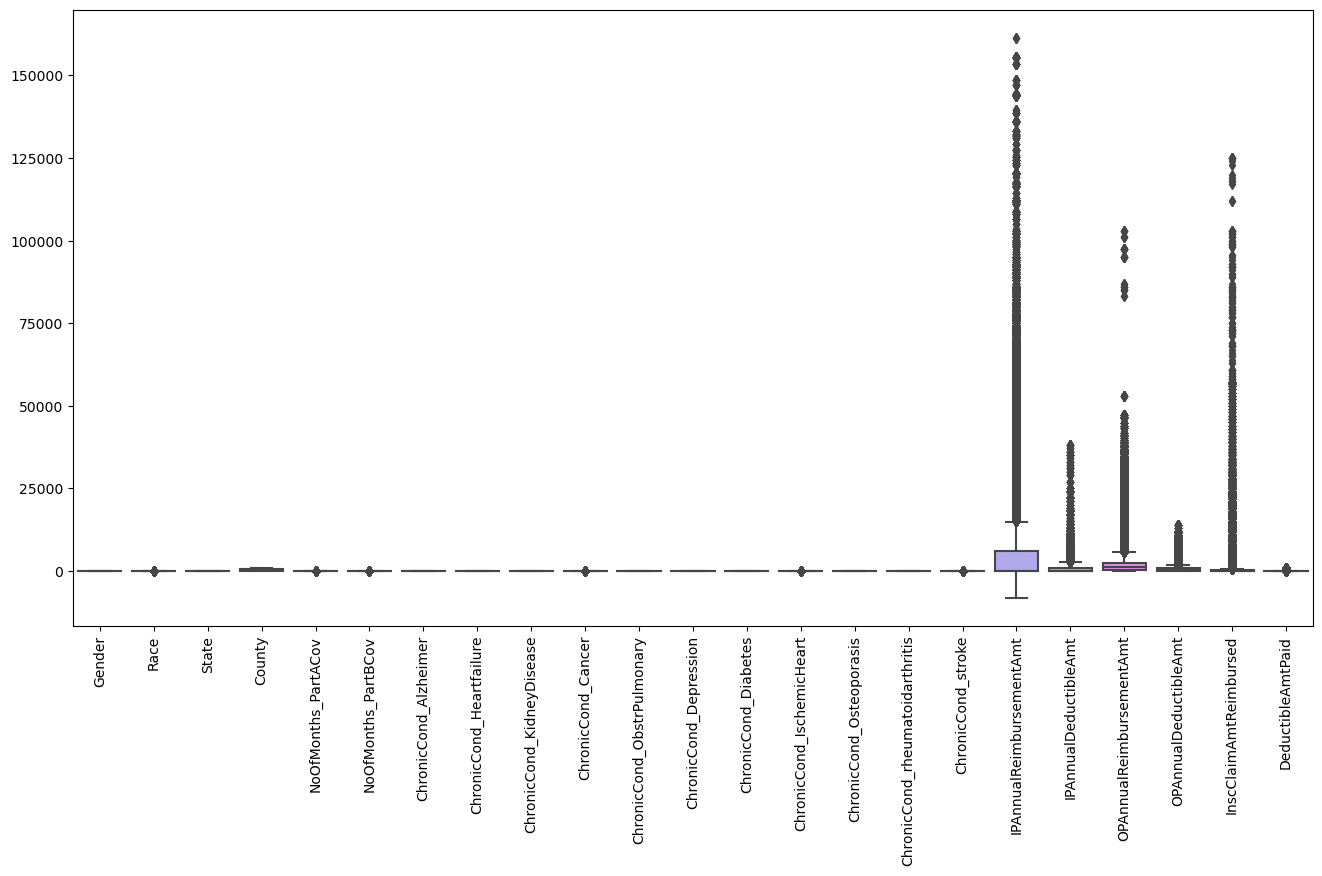

In [15]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(df)
plt.show()

***Outliers are present in 12 features.***

In [16]:
Outlier_columns=['Race','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Cancer','ChronicCond_IschemicHeart','ChronicCond_stroke','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','InscClaimAmtReimbursed','DeductibleAmtPaid']

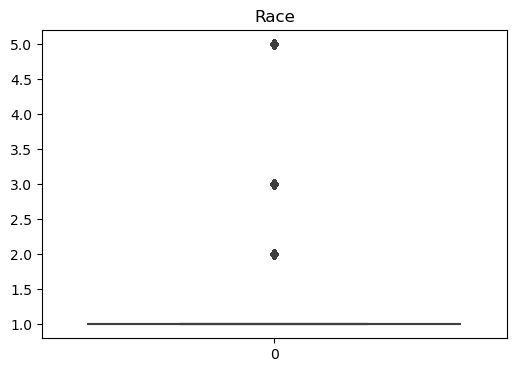

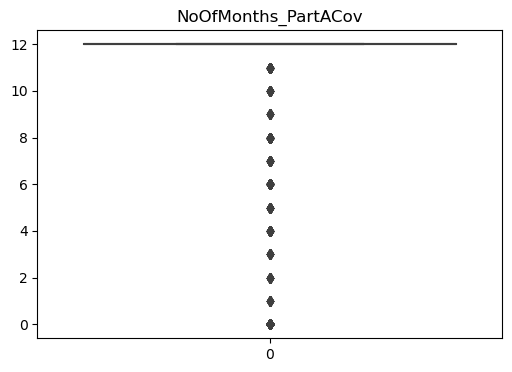

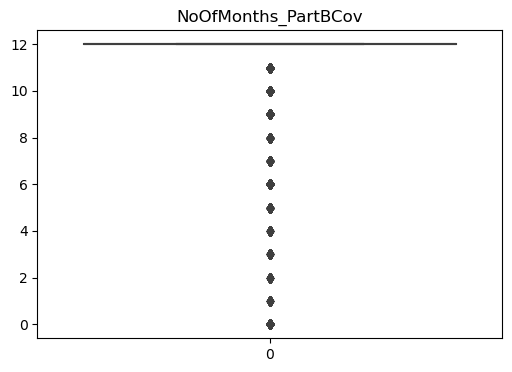

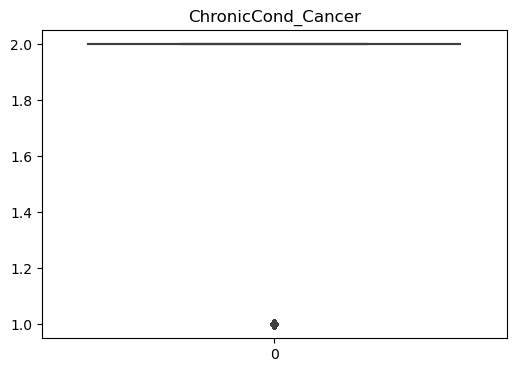

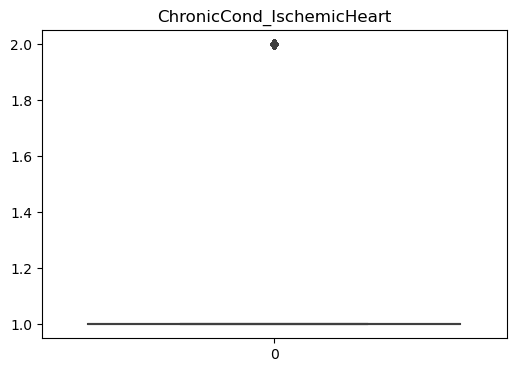

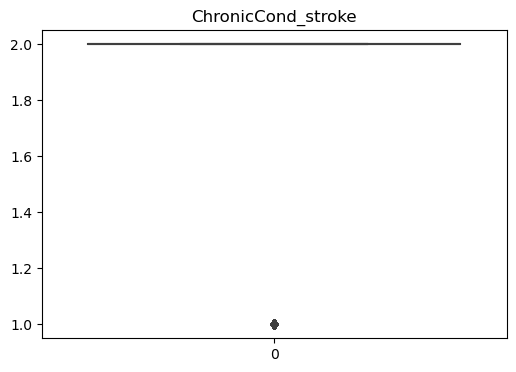

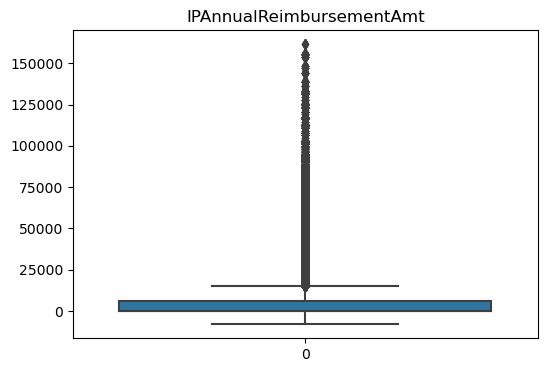

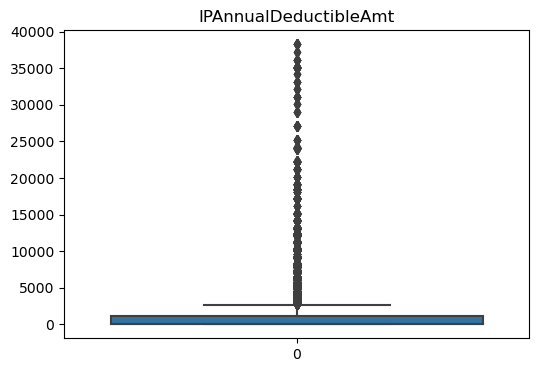

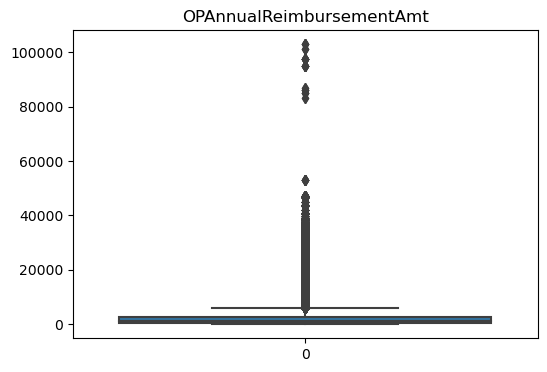

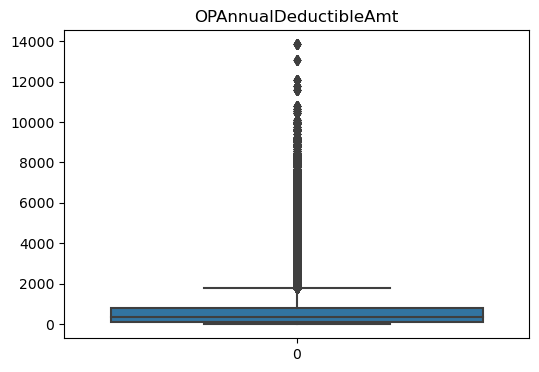

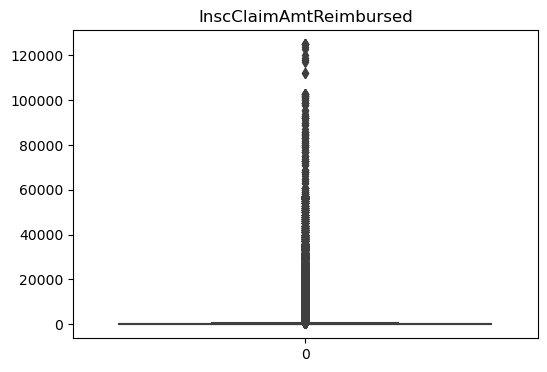

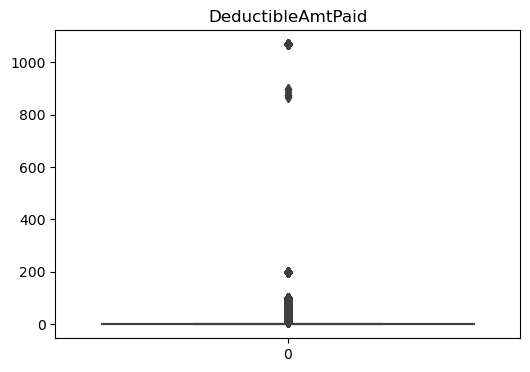

In [17]:
for i in Outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

***We keep the outliers in'ChronicCond_Cancer','ChronicCond_IschemicHeart' and 'ChronicCond_stroke' features since it may affect our prediction.***

In [18]:
for i in ['Race','NoOfMonths_PartACov','NoOfMonths_PartBCov','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','InscClaimAmtReimbursed','DeductibleAmtPaid']:
    print('Skewness of',i,':',df[i].skew())

Skewness of Race : 3.593678971404411
Skewness of NoOfMonths_PartACov : -13.135231500609223
Skewness of NoOfMonths_PartBCov : -13.958267342935143
Skewness of IPAnnualReimbursementAmt : 3.9941501175260057
Skewness of IPAnnualDeductibleAmt : 8.156710840901287
Skewness of OPAnnualReimbursementAmt : 5.516594318575648
Skewness of OPAnnualDeductibleAmt : 4.356273598010318
Skewness of InscClaimAmtReimbursed : 9.491423501397835
Skewness of DeductibleAmtPaid : 3.3274267152795565


All are skewed distributions. So use IQR (Inter Quartile Range) method for outlier detection.

### IQR method for outlier detection and clip function for outlier handling

In [19]:
for i in ['Race','NoOfMonths_PartACov','NoOfMonths_PartBCov','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','InscClaimAmtReimbursed','DeductibleAmtPaid']:
    Q1=np.percentile(df[i],25,method='midpoint')
    Q3=np.percentile(df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)    
    df[i]=df[i].clip(lower=low_lim,upper=up_lim)

### Check again for outliers

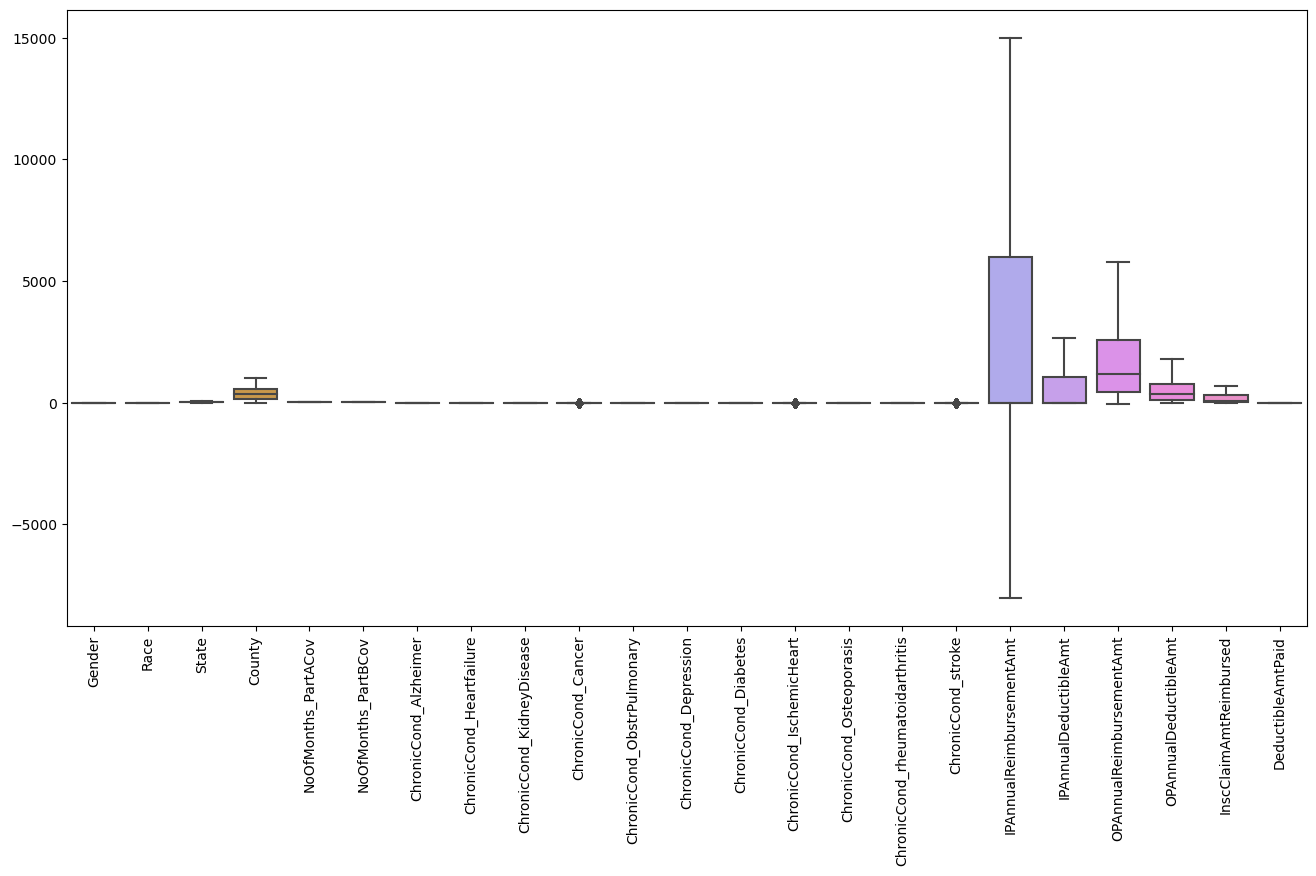

In [20]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
sns.boxplot(df)
plt.show()

# Feature Engineering

### Make ClaimID as index column

In [21]:
df.set_index('ClaimID',inplace=True)

### Check for unique values

In [22]:
for column in df.columns:
    print(column,df[column].nunique())

BeneID 138556
DOB 900
Gender 2
Race 1
RenalDiseaseIndicator 2
State 52
County 314
NoOfMonths_PartACov 1
NoOfMonths_PartBCov 1
ChronicCond_Alzheimer 2
ChronicCond_Heartfailure 2
ChronicCond_KidneyDisease 2
ChronicCond_Cancer 2
ChronicCond_ObstrPulmonary 2
ChronicCond_Depression 2
ChronicCond_Diabetes 2
ChronicCond_IschemicHeart 2
ChronicCond_Osteoporasis 2
ChronicCond_rheumatoidarthritis 2
ChronicCond_stroke 2
IPAnnualReimbursementAmt 868
IPAnnualDeductibleAmt 25
OPAnnualReimbursementAmt 586
OPAnnualDeductibleAmt 198
ClaimStartDt 398
ClaimEndDt 366
Provider 5410
InscClaimAmtReimbursed 70
AttendingPhysician 82063
OperatingPhysician 35315
OtherPhysician 46457
ClmAdmitDiagnosisCode 4098
DeductibleAmtPaid 1
ClmDiagnosisCode_1 10450
ClmDiagnosisCode_2 5300
ClmDiagnosisCode_3 4756
ClmDiagnosisCode_4 4359
ClmDiagnosisCode_5 3970
PotentialFraud 2


***Features 'NoOfMonths_PartACov','NoOfMonths_PartBCov','Race' and 'DeductibleAmtPaid' contain only one value. So drop them.***

### Drop un necesssary columns

In [23]:
df.drop(['Gender','State','County','Race','DeductibleAmtPaid','NoOfMonths_PartACov','NoOfMonths_PartBCov','RenalDiseaseIndicator','ClaimStartDt','ClaimEndDt',
        'ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5'],axis=1,inplace=True)

### Create 'BirthYear' feature from DOB and drop DOB

In [24]:
df['BirthYear'] = pd.DatetimeIndex(df['DOB']).year

In [25]:
df.drop('DOB',axis=1,inplace=True)

### Create 'TotalAnnualReimbursementAmt' feature by  adding IP & OP AnnualReimbursementAmt and drop them

In [26]:
df['TotalAnnualReimbursementAmt']=df['IPAnnualReimbursementAmt'] + df['OPAnnualReimbursementAmt']

In [27]:
df.drop(['IPAnnualReimbursementAmt','OPAnnualReimbursementAmt'],axis=1,inplace=True)

### Create 'TotalAnnualDeductibleAmt' feature by  adding IP & OP AnnualDeductibleAmt and drop them

In [28]:
df['TotalAnnualDeductibleAmt']=df['IPAnnualDeductibleAmt'] + df['OPAnnualDeductibleAmt']

In [29]:
df.drop(['IPAnnualDeductibleAmt','OPAnnualDeductibleAmt'],axis=1,inplace=True)

###  Encoding

In [30]:
for i in range(0,558211):
    df['BeneID'][i]=df['BeneID'][i].replace('BENE','')
    df['Provider'][i]=df['Provider'][i].replace('PRV','')
    df['AttendingPhysician'][i]=df['AttendingPhysician'][i].replace('PHY','')
    df['OperatingPhysician'][i]=df['OperatingPhysician'][i].replace('PHY','')
    df['OtherPhysician'][i]=df['OtherPhysician'][i].replace('PHY','')
    df['ClmAdmitDiagnosisCode'][i]=df['ClmAdmitDiagnosisCode'][i].replace('V','')
    df['ClmAdmitDiagnosisCode'][i]=df['ClmAdmitDiagnosisCode'][i].replace('E','')

In [31]:
for i in ['BeneID','Provider','AttendingPhysician','OperatingPhysician','OtherPhysician','ClmAdmitDiagnosisCode']:
    df[i]=df[i].astype('int')

In [32]:
df['PotentialFraud']=df['PotentialFraud'].replace({'Yes':1,'No':0}).astype('int')

In [33]:
df

,BeneID,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,PotentialFraud,BirthYear,TotalAnnualReimbursementAmt,TotalAnnualDeductibleAmt
ClaimID,,,,,,,,,,,,,,,,,,,,,,
CLM46614,11001,1,2,1,2,2,1,1,1,2,1,1,55912,690,390922,330576,412132,7866,1,1943,15060,2740
CLM34721,17521,1,1,1,2,1,2,2,1,2,2,2,55912,690,349293,370861,363291,45340,1,1913,15100,1088
CLM72336,21718,2,2,2,2,2,2,2,1,1,2,2,55912,690,334706,334706,412132,5789,1,1922,16050,1608
CLM73394,22934,2,1,2,2,1,2,1,1,1,1,2,55912,690,390614,323689,363291,71946,1,1930,15450,2296
CLM32911,24402,1,2,2,1,2,2,2,1,2,2,2,55912,690,380413,432598,412132,1748,1,1925,8785,1808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM184358,154687,1,2,1,2,2,2,1,1,2,1,2,54302,690,376238,376238,412132,99639,0,1927,4400,220
CLM603185,157252,2,2,1,1,1,2,1,1,2,2,2,57762,690,432730,330576,412132,1748,0,1942,17540,1468
CLM460770,157378,1,1,1,2,1,2,1,1,2,2,2,51577,690,338096,330576,412132,7612,0,1946,5785,1795


### Change the dataframe appearance

In [34]:
df=df.iloc[:,[0,19,1,2,3,4,5,6,7,8,9,10,11,13,20,21,12,14,15,16,17,18]]
df

,BeneID,BirthYear,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,InscClaimAmtReimbursed,TotalAnnualReimbursementAmt,TotalAnnualDeductibleAmt,Provider,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,PotentialFraud
ClaimID,,,,,,,,,,,,,,,,,,,,,,
CLM46614,11001,1943,1,2,1,2,2,1,1,1,2,1,1,690,15060,2740,55912,390922,330576,412132,7866,1
CLM34721,17521,1913,1,1,1,2,1,2,2,1,2,2,2,690,15100,1088,55912,349293,370861,363291,45340,1
CLM72336,21718,1922,2,2,2,2,2,2,2,1,1,2,2,690,16050,1608,55912,334706,334706,412132,5789,1
CLM73394,22934,1930,2,1,2,2,1,2,1,1,1,1,2,690,15450,2296,55912,390614,323689,363291,71946,1
CLM32911,24402,1925,1,2,2,1,2,2,2,1,2,2,2,690,8785,1808,55912,380413,432598,412132,1748,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM184358,154687,1927,1,2,1,2,2,2,1,1,2,1,2,690,4400,220,54302,376238,376238,412132,99639,0
CLM603185,157252,1942,2,2,1,1,1,2,1,1,2,2,2,690,17540,1468,57762,432730,330576,412132,1748,0
CLM460770,157378,1946,1,1,1,2,1,2,1,1,2,2,2,690,5785,1795,51577,338096,330576,412132,7612,0


### Seperating the target (y) and independent variables (x)

In [35]:
x=df.drop('PotentialFraud',axis=1)
y=df['PotentialFraud'].values.reshape(-1,1)

### Train Test Split

Take test size as 0.3 since the size of dataset is high

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

# Modelling

## Decision Tree

In [37]:
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_test)

In [38]:
metric=['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']
table= pd.DataFrame([[dt_clf.score(x_train,y_train)],[accuracy_score(y_test,dt_pred)],[precision_score(y_test,dt_pred)],[recall_score(y_test,dt_pred)],[f1_score(y_test,dt_pred)]],columns=['Decision Tree'])
table.index=metric
table

,Decision Tree
Train Accuracy,1.000000
Test Accuracy,0.994668
Precision,0.992168
Recall,0.993834
F1 Score,0.993000


### Confusion Matrix and Classification Report

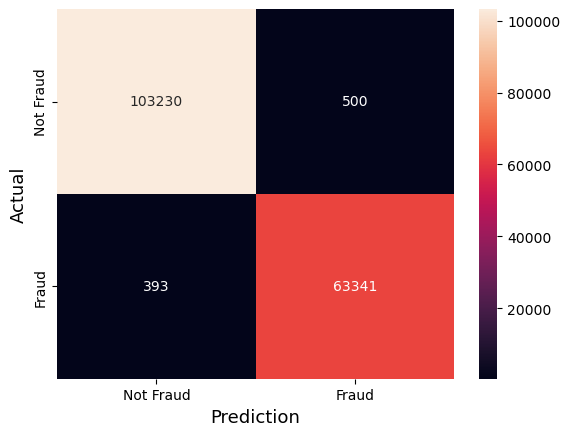

In [39]:
cm = confusion_matrix(y_test,dt_pred)
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Not Fraud','Fraud'],
            yticklabels=['Not Fraud','Fraud'])
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.show()

In [40]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103730
           1       0.99      0.99      0.99     63734

    accuracy                           0.99    167464
   macro avg       0.99      0.99      0.99    167464
weighted avg       0.99      0.99      0.99    167464



***Metric values are good.***

### Save Decision Tree model by pickling

In [41]:
with open('model.pkl','wb') as model_file:
  pickle.dump(dt_clf,model_file)